In [1]:
from IPython.display import Image, display

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot

In [4]:
from keras_visualizer import visualizer

In [5]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions

In [6]:
# Set Seed value for reproducible results
seed_val = 2
os.environ['PYTHONHASHSEED']=str(seed_val)
tf.random.set_seed(seed_val)
np.random.seed(seed_val)
random.seed(seed_val)

In [7]:
# Load the IRIS data
X, y = iris_data()
X = X[:, [2, 3]]

In [8]:
# Normalize to zero mean and unit standard deviation
X = standardize(X)

# OneHot encoding
y_onehot = to_categorical(y)

In [9]:
# Create the network
np.random.seed(123)
network = Sequential()
network.add(Dense(8, input_shape=(2,), activation='relu', kernel_initializer='he_uniform'))
network.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
network.add(Dense(3, activation='softmax'))

In [10]:
# Display all the layers of the network
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Visualize the network
visualizer(network, filename='graph_2c', format='png', view=False)
display(Image(filename='graph_2c.png'))

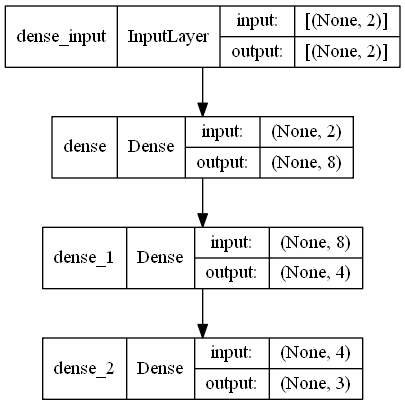

In [12]:
# Visualize Network
plot_model(network, to_file='network_2c.png', show_shapes=True)

In [13]:
# Configure the network and start training
network.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate=0.005),
                metrics=['accuracy'])

history = network.fit(X, y_onehot, epochs=100, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/100
17/17 [==============================] - 1s 25ms/step - loss: 1.2703 - accuracy: 0.1778 - val_loss: 1.2096 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1.0232 - accuracy: 0.5704 - val_loss: 1.1187 - val_accuracy: 0.0667
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8643 - accuracy: 0.7259 - val_loss: 1.0064 - val_accuracy: 1.0000
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7407 - accuracy: 0.7926 - val_loss: 0.8820 - val_accuracy: 1.0000
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6394 - accuracy: 0.8741 - val_loss: 0.7345 - val_accuracy: 1.0000
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5605 - accuracy: 0.8741 - val_loss: 0.5166 - val_accuracy: 1.0000
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.9037 - val_loss: 0.3608 - val_accuracy: 1.0000
Epoch 8/

Epoch 59/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0874 - accuracy: 0.9630 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 60/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9556 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 61/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9630 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 62/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9630 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 63/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0846 - accuracy: 0.9556 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 64/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9556 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0866 - accuracy: 0.9556 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 

In [14]:
class Onehot2Int(object):

    def __init__(self, network):
        self.network = network

    def predict(self, X):
        y_pred = self.network.predict(X)
        return np.argmax(y_pred, axis=1)

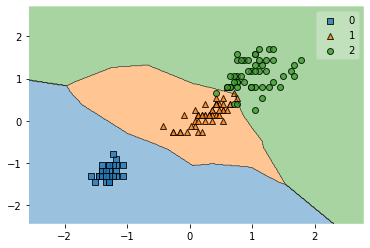

In [15]:
# Wrap keras network
network_no_ohe = Onehot2Int(network)

# Plot decision boundary
plot_decision_regions(X, y, clf=network_no_ohe)
plt.show()